# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

In [2]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [3]:
# insert your code here

#Relabel DMDMARTL
da['DMDMARTLx'] = da.DMDMARTL.replace({1:'Married',2:'Widowed',3:'Divorced',4:'Separated',5:'Never married', 
                                           6:'Living with a partner', 77:'Refused', 99: "Don't know"})
da.DMDMARTLx.value_counts().sum()

5474

In [4]:
#Null values
pd.isnull(da.DMDMARTLx).sum()

261

In [5]:
#Fill missing values
da["DMDMARTLx"] = da.DMDMARTLx.fillna("Missing")
da.DMDMARTLx.value_counts()

Married                  2780
Never married            1004
Divorced                  579
Living with a partner     527
Widowed                   396
Missing                   261
Separated                 186
Refused                     2
Name: DMDMARTLx, dtype: int64

In [6]:
#Frequency tables for all people
x = da.DMDMARTLx.value_counts()
x/x.sum()

Married                  0.484743
Never married            0.175065
Divorced                 0.100959
Living with a partner    0.091892
Widowed                  0.069050
Missing                  0.045510
Separated                0.032432
Refused                  0.000349
Name: DMDMARTLx, dtype: float64

In [7]:
#Relabel gender variable
da['RIAGENDRx'] = da.RIAGENDR.replace({1:'Male',2:'Female'})

In [8]:
#Frequency table for males only
x = da[da['RIAGENDRx'] == 'Male']['DMDMARTLx'].value_counts()
x/x.sum()

Married                  0.535339
Never married            0.175426
Living with a partner    0.096049
Divorced                 0.083001
Missing                  0.048931
Widowed                  0.036245
Separated                0.024647
Refused                  0.000362
Name: DMDMARTLx, dtype: float64

In [9]:
#Frequency table for females only
x = da[da['RIAGENDRx'] == 'Female']['DMDMARTLx'].value_counts()
x/x.sum()

Married                  0.437836
Never married            0.174731
Divorced                 0.117608
Widowed                  0.099462
Living with a partner    0.088038
Missing                  0.042339
Separated                0.039651
Refused                  0.000336
Name: DMDMARTLx, dtype: float64

In [12]:
# Create age strata based on this cut points
da["agegrp"] = pd.cut(da.RIDAGEYR, [30, 40])
#For all people between the ages of 30 and 40
x =da.groupby(['agegrp'])['DMDMARTLx'].value_counts()
print(x/x.sum())
#For males between the ages of 30 and 40
y = da[da['RIAGENDRx'] == 'Male'].groupby(['agegrp'])['DMDMARTLx'].value_counts()
print(y/y.sum())
#For females between the ages of 30 and 40
z = da[da['RIAGENDRx'] == 'Female'].groupby(['agegrp'])['DMDMARTLx'].value_counts()
print(z/z.sum())

agegrp    DMDMARTLx            
(30, 40]  Married                  0.553648
          Never married            0.199571
          Living with a partner    0.138412
          Divorced                 0.071888
          Separated                0.031116
          Widowed                  0.004292
          Refused                  0.001073
Name: DMDMARTLx, dtype: float64
agegrp    DMDMARTLx            
(30, 40]  Married                  0.563319
          Never married            0.194323
          Living with a partner    0.157205
          Divorced                 0.052402
          Separated                0.026201
          Widowed                  0.004367
          Refused                  0.002183
Name: DMDMARTLx, dtype: float64
agegrp    DMDMARTLx            
(30, 40]  Married                  0.544304
          Never married            0.204641
          Living with a partner    0.120253
          Divorced                 0.090717
          Separated                0.035865
    

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [39]:
dx = da[da.RIAGENDRx == 'Female']
dx = dx.loc[~da.DMDMARTLx.isin(["Refused", "Missing"]), :]  # Eliminate rare/missing values
dx["agegrp2"] = pd.cut(dx.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80]) # Create age strata based on these cut points
dx = dx.groupby(["agegrp2"])["DMDMARTLx"]
dx = dx.value_counts()
dx = dx.unstack() # Restructure the results from 'long' to 'wide' 
dx = dx.apply(lambda x: x/x.sum(), axis=1)# Normalize within each stratum to get proportions
dx = dx.fillna(0) #Fill missing values
print(dx.to_string(float_format="%.3f"))  # Limit display to 3 decimal places

DMDMARTLx  Divorced  Living with a partner  Married  Never married  Separated  Widowed
agegrp2                                                                               
(18, 30]      0.020                  0.206    0.286          0.468      0.020    0.000
(30, 40]      0.091                  0.120    0.544          0.205      0.036    0.004
(40, 50]      0.137                  0.074    0.574          0.125      0.066    0.024
(50, 60]      0.177                  0.068    0.548          0.090      0.058    0.060
(60, 70]      0.193                  0.043    0.481          0.086      0.050    0.147
(70, 80]      0.144                  0.007    0.317          0.051      0.020    0.461


__Q2a.__ Repeat the construction for males.

In [41]:
dy = da[da.RIAGENDRx == 'Male']
dy = dy.loc[~da.DMDMARTLx.isin(["Refused", "Missing"]), :]  # Eliminate rare/missing values
dy["agegrp2"] = pd.cut(dy.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80]) # Create age strata based on these cut points
dy = dy.groupby(["agegrp2"])["DMDMARTLx"]
dy = dy.value_counts()
dy = dy.unstack() # Restructure the results from 'long' to 'wide'
dy = dy.apply(lambda x: x/x.sum(), axis=1) # Normalize within each stratum to get proportions
print(dy.to_string(float_format="%.3f"))  # Limit display to 3 decimal places

DMDMARTLx  Divorced  Living with a partner  Married  Never married  Separated  Widowed
agegrp2                                                                               
(18, 30]      0.004                  0.201    0.220          0.555      0.015    0.004
(30, 40]      0.053                  0.158    0.565          0.195      0.026    0.004
(40, 50]      0.085                  0.082    0.703          0.097      0.027    0.005
(50, 60]      0.126                  0.075    0.652          0.104      0.022    0.022
(60, 70]      0.126                  0.050    0.666          0.087      0.032    0.039
(70, 80]      0.142                  0.022    0.612          0.022      0.035    0.167


## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

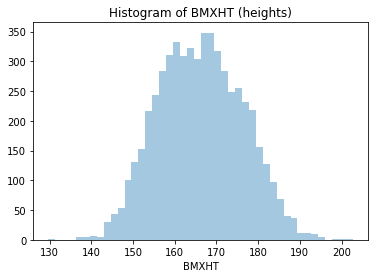

In [47]:
sns.distplot(da.BMXHT.dropna(), kde = False).set_title('Histogram of BMXHT (heights)')
plt.show()

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

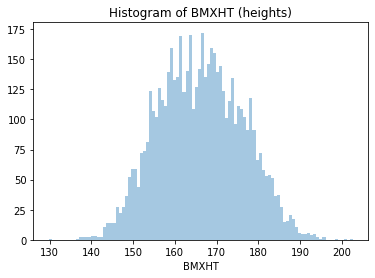

In [57]:
#100 Bins
sns.distplot(da.BMXHT.dropna(), kde = False, bins = 100).set_title('Histogram of BMXHT (heights)')
plt.show()

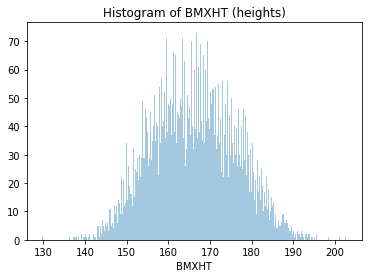

In [58]:
#300 bins
sns.distplot(da.BMXHT.dropna(), kde = False, bins = 300).set_title('Histogram of BMXHT (heights)')
plt.show()

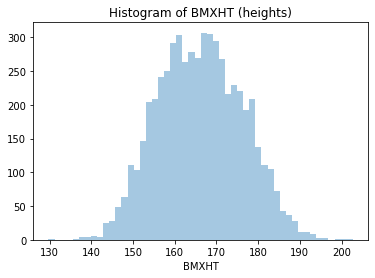

In [59]:
#50 Bins
sns.distplot(da.BMXHT.dropna(), kde = False, bins = 50).set_title('Histogram of BMXHT (heights)')
plt.show()

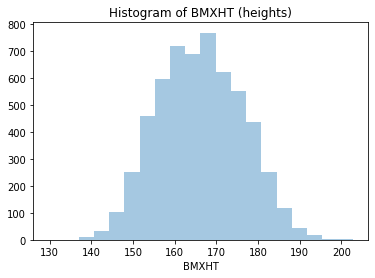

In [60]:
#20 Bins
sns.distplot(da.BMXHT.dropna(), kde = False, bins = 20).set_title('Histogram of BMXHT (heights)')
plt.show()

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

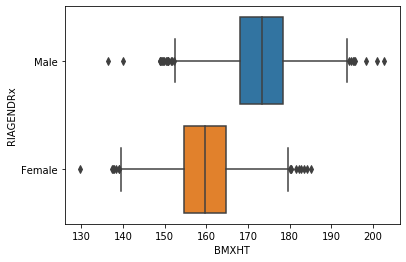

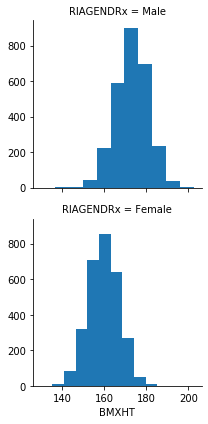

In [64]:
sns.boxplot(x = da.BMXHT.dropna(), y = da.RIAGENDRx)
g = sns.FacetGrid(da, row = 'RIAGENDRx')
g.map(plt.hist, 'BMXHT')
plt.show()

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

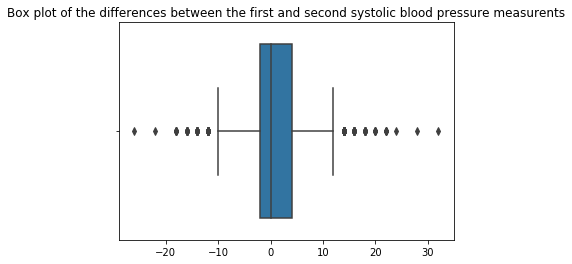

In [72]:
# insert your code here
sns.boxplot(x = da.BPXSY1-da.BPXSY2).set_title('Box plot of the differences between the first and second systolic blood pressure measurents')
plt.show()

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [81]:
#Get proportion
da['Differences'] = da.BPXSY1.dropna()-da.BPXSY2.dropna()
proportion = da[da.Differences > 0]['Differences'].count()/da['Differences'].shape[0]
proportion

0.42946817785527464

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

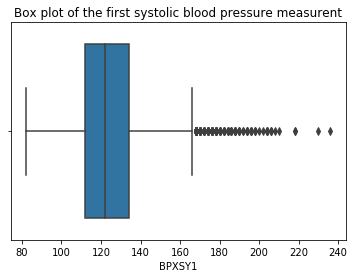

In [82]:
sns.boxplot(x = da.BPXSY1).set_title('Box plot of the first systolic blood pressure measurent')
plt.show()

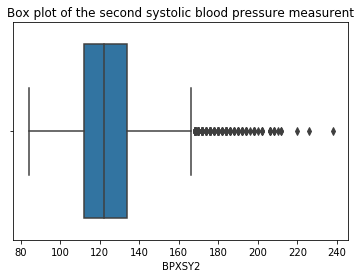

In [83]:
sns.boxplot(x = da.BPXSY2).set_title('Box plot of the second systolic blood pressure measurent')
plt.show()

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [113]:
#Relabel DMDEDUC2
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
df = da.loc[~da.DMDEDUC2x.isin(["Don't know"]), :]
df = df.groupby(['DMDEDUC2x'])['DMDHHSIZ']
df = df.value_counts()
df = df.unstack()
df = df.apply(lambda x: x/x.sum(), axis=1)
print(df.to_string(float_format="%.3f"))

DMDHHSIZ            1     2     3     4     5     6     7
DMDEDUC2x                                                
9-11            0.117 0.222 0.163 0.152 0.146 0.114 0.086
<9              0.110 0.224 0.147 0.133 0.148 0.108 0.130
College         0.143 0.348 0.194 0.165 0.095 0.029 0.026
HS/GED          0.153 0.271 0.171 0.162 0.110 0.066 0.068
Some college/AA 0.151 0.269 0.193 0.169 0.122 0.051 0.045


__Q5a.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [133]:
df1 = da[da.agegrp.notnull()] 
#df1.DMDEDUC2x.value_counts()
df1 = df1.groupby(['RIAGENDRx', 'DMDEDUC2x'])['DMDHHSIZ']
df1 = df1.median()
df1 = df1.unstack()
print(df1.to_string())

DMDEDUC2x  9-11  <9  College  HS/GED  Some college/AA
RIAGENDRx                                            
Female        5   5        4       5                4
Male          5   5        3       4                4
